In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
np.random.seed(42)

S&P 500 stocks data

In [3]:
start_date = '2017-01-01'
end_date = '2023-01-01'

sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


Randomly sampling 5 stocks from each GICS sector

In [4]:
tickers = []
for sector, sector_tickers in sp500_tickers.groupby("GICS Sector"):
    tickers.append(sector_tickers.sample(5))
tickers = pd.concat(tickers)
tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
169,EA,Electronic Arts,Communication Services,Interactive Home Entertainment,"Redwood City, California",2002-07-22,712515,1982
338,NWSA,News Corp (Class A),Communication Services,Publishing,"New York City, New York",2013-08-01,1564708,2013 (1980)
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
356,OMC,Omnicom Group,Communication Services,Advertising,"New York City, New York",1997-12-31,29989,1986
259,IPG,Interpublic Group of Companies (The),Communication Services,Advertising,"New York City, New York",1992-10-01,51644,1961 (1930)


Using Yahoo Finance to fetch data of the sampled stocks between 01/01/2017 - 01/01/2023

In [5]:
data = yf.download(tickers["Symbol"].tolist(), start=start_date, end=end_date)
data

[*********************100%***********************]  55 of 55 completed


Adj Close                                                         \
                   AAP       AMCR        APH       ATVI       BBWI         BG   
Date                                                                            
2017-01-03  158.060928   8.131390  31.703163  35.324673  43.159157  60.739582   
2017-01-04  159.358017   8.131390  31.938244  36.018822  43.651814  59.935123   
2017-01-05  159.246811   8.131390  31.768980  36.578007  40.216187  58.964825   
2017-01-06  157.162170   8.131390  32.008774  36.549080  39.691128  58.168671   
2017-01-09  157.069565   8.131390  31.679653  36.346622  39.736500  58.168671   
...                ...        ...        ...        ...        ...        ...   
2022-12-23  141.508774  11.929075  75.602676  75.949997  41.746014  98.341248   
2022-12-27  143.227280  11.948857  76.141205  75.790001  41.755970  99.951126   
2022-12-28  143.503815  11.780704  74.685196  76.050003  40.561520  98.877876   
2022-12-29  144.501328  11.889509  76.410469  76.760002  41.457355  99.166061   
2022-12-30  145.212418  11.780704  75.931778  76.550003  41.945087  99.146179   

                                                          ...   Volume  \
                  BSX         BXP        CBOE       CDAY  ...     SCHW   
Date                                                      ...            
2017-01-03  21.879999  101.391769   71.408882        NaN  ...  6950900   
2017-01-04  22.080000  104.612610   74.215927        NaN  ...  8892900   
2017-01-05  22.049999  105.114845   73.443253        NaN  ...  6336200   
2017-01-06  22.150000  104.875671   73.844276        NaN  ...  5639700   
2017-01-09  22.190001  103.831322   72.895523        NaN  ...  4413500   
...               ...         ...         ...        ...  ...      ...   
2022-12-23  46.060001   66.147011  126.180000  62.029999  ...  4756400   
2022-12-27  46.240002   66.630539  126.370003  60.599998  ...  5346500   
2022-12-28  45.779999   64.154861  126.120003  60.610001  ...  3382700   
2022-12-29  46.349998   66.294670  127.180000  63.230000  ...  3378500   
2022-12-30  46.270000   66.333939  125.470001  64.150002  ...  5058400   

                                                                           \
               SEDG      SPG      SRE     STLD      TER     TRGP     TSCO   
Date                                                                        
2017-01-03  1123600  2751200  1113200  2551000  1650700  1799700  1253300   
2017-01-04  1363300  1991700  1389100  3852700  2448400  1339200  1415000   
2017-01-05   647700  2186400  2008100  3516600  1590500  1393300  1515000   
2017-01-06   537300  2251400   934600  2743600  2354000  1720500  1464200   
2017-01-09   733400  1954000  1005100  2120200  1966000  2407400   877700   
...             ...      ...      ...      ...      ...      ...      ...   
2022-12-23   413700   680200   637300  1423500   858600   882100   728600   
2022-12-27   724300  1234200   521200  1144700  1156000   711100  1057500   
2022-12-28  1471500   983700   794100  1137600   990300   850600   789100   
2022-12-29   718400   972800   935800  1438300  1137300   824700   797800   
2022-12-30   485700  1265300  1072600  1390400   677400  1549900   719000   

                              
                UNP       WY  
Date                          
2017-01-03  3824300  2650200  
2017-01-04  3668300  3678500  
2017-01-05  4180400  3548000  
2017-01-06  3862400  2679300  
2017-01-09  2968600  4017600  
...             ...      ...  
2022-12-23  1639500  1932800  
2022-12-27  1139700  2266000  
2022-12-28  1631200  2244100  
2022-12-29  1484800  1846000  
2022-12-30  1554200  3166600  

[1510 rows x 330 columns]

In [6]:
features = list({x for x,y in data.columns})
features

['Adj Close', 'Close', 'Open', 'Low', 'Volume', 'High']

Preprocessing of the adjusted closing price data

In [7]:
stock_adj_close = data['Adj Close']
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
stock_adj_close = stock_adj_close.reindex(all_weekdays)
stock_adj_close = stock_adj_close.fillna(method='ffill')
stock_adj_close

,AAP,AMCR,APH,ATVI,BBWI,BG,BSX,BXP,CBOE,CDAY,...,SCHW,SEDG,SPG,SRE,STLD,TER,TRGP,TSCO,UNP,WY
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,158.060928,8.131390,31.703163,35.324673,43.159157,60.739582,21.879999,101.391769,71.408882,NaN,...,37.275703,13.200000,131.359894,83.024956,31.384260,24.433271,42.208736,69.209068,89.572784,23.215040
2017-01-04,159.358017,8.131390,31.938244,36.018822,43.651814,59.935123,22.080000,104.612610,74.215927,NaN,...,38.221512,14.400000,132.410065,83.739212,32.745018,24.577677,42.419846,70.020607,90.114487,23.421497
2017-01-05,159.246811,8.131390,31.768980,36.578007,40.216187,58.964825,22.049999,105.114845,73.443253,NaN,...,37.989700,13.800000,132.640259,83.542152,32.927036,24.683573,42.944008,68.962868,89.232040,23.666187
2017-01-06,157.162170,8.131390,32.008774,36.549080,39.691128,58.168671,22.150000,104.875671,73.844276,NaN,...,38.230782,13.750000,134.388153,84.494476,31.869629,24.693199,43.249760,68.534294,90.158180,23.589718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,141.508774,11.929075,75.602676,75.949997,41.746014,98.341248,46.060001,66.147011,126.180000,62.029999,...,81.516396,310.149994,116.172913,156.477386,101.847427,86.472214,73.019241,216.100464,208.503540,30.477425
2022-12-27,143.227280,11.948857,76.141205,75.790001,41.755970,99.951126,46.240002,66.630539,126.370003,60.599998,...,81.965012,293.040009,116.360107,157.558594,102.155197,84.674042,73.546783,222.103806,208.910797,30.458067
2022-12-28,143.503815,11.780704,74.685196,76.050003,40.561520,98.877876,45.779999,64.154861,126.120003,60.610001,...,82.094604,275.839996,113.364891,155.058929,99.166977,84.154564,71.615791,218.927902,205.483902,29.645077
2022-12-29,144.501328,11.889509,76.410469,76.760002,41.457355,99.166061,46.349998,66.294670,127.180000,63.230000,...,82.403648,280.660004,115.591599,154.622482,98.031364,87.401268,73.297943,225.976608,207.818161,30.312891


In [8]:
stock_adj_close.describe()

,AAP,AMCR,APH,ATVI,BBWI,BG,BSX,BXP,CBOE,CDAY,...,SCHW,SEDG,SPG,SRE,STLD,TER,TRGP,TSCO,UNP,WY
count,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1222.000000,...,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000
mean,149.186313,9.708237,53.064793,67.230922,31.870652,65.115579,36.632180,99.183915,106.497643,67.301309,...,52.002208,145.019584,113.384525,116.631518,43.478497,71.630104,39.963726,121.579498,164.225895,27.428479
std,35.196568,1.355573,14.804643,15.088701,15.483694,19.626564,6.342259,14.131218,14.489609,23.852960,...,16.114491,113.915551,26.079816,21.142938,19.811274,37.092477,15.131267,57.059704,45.746072,5.241203
min,70.084991,5.264850,31.312927,35.324673,7.183748,27.742785,21.879999,62.859001,71.408882,30.520000,...,27.339828,12.300000,37.024483,79.592392,14.355663,24.433271,4.471078,45.949875,89.232040,11.866328
25%,128.930073,8.574128,41.644592,55.074713,19.907804,50.322986,31.820000,91.751379,95.254669,49.607499,...,39.150884,40.292500,104.029947,98.172762,29.518397,38.698195,33.290178,72.986345,127.532486,23.950891
50%,147.123718,9.505870,47.289696,68.518471,29.134521,60.290339,37.970001,101.830921,107.422688,62.754999,...,46.895679,90.584999,119.925488,115.760727,34.985359,61.017298,37.080839,96.318333,159.555992,27.144260
75%,168.758724,10.835640,66.486879,78.508034,39.589207,76.402056,42.072500,109.281582,118.445002,86.102501,...,66.117390,266.037506,130.601646,128.698959,57.980780,105.012720,44.723606,181.125683,206.196285,30.763854
max,230.368683,13.072927,86.716194,102.699326,76.459137,123.833275,47.200001,127.717171,135.639557,130.320007,...,94.181404,368.329987,156.517838,171.767365,109.581047,167.646378,79.176071,233.240677,270.029663,40.235435


Calculating the relative returns using pandas "pct_change" function (the percentage of change between each row and the previous row)

$$ 
r_{rel} = {{p_t - p_{t-1}} \over {p_{t-1}}}
$$

In [9]:
relative_returns = stock_adj_close.pct_change(1)
relative_returns

,AAP,AMCR,APH,ATVI,BBWI,BG,BSX,BXP,CBOE,CDAY,...,SCHW,SEDG,SPG,SRE,STLD,TER,TRGP,TSCO,UNP,WY
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008206,0.000000,0.007415,0.019651,0.011415,-0.013244,0.009141,0.031766,0.039309,NaN,...,0.025373,0.090909,0.007995,0.008603,0.043358,0.005910,0.005002,0.011726,0.006048,0.008893
2017-01-05,-0.000698,0.000000,-0.005300,0.015525,-0.078705,-0.016189,-0.001359,0.004801,-0.010411,NaN,...,-0.006065,-0.041667,0.001738,-0.002353,0.005559,0.004309,0.012357,-0.015106,-0.009793,0.010447
2017-01-06,-0.013091,0.000000,0.007548,-0.000791,-0.013056,-0.013502,0.004535,-0.002275,0.005460,NaN,...,0.006346,-0.003623,0.013178,0.011399,-0.032114,0.000390,0.007120,-0.006215,0.010379,-0.003231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-12-27,0.012144,0.001658,0.007123,-0.002107,0.000238,0.016370,0.003908,0.007310,0.001506,-0.023053,...,0.005503,-0.055167,0.001611,0.006910,0.003022,-0.020795,0.007225,0.027780,0.001953,-0.000635
2022-12-28,0.001931,-0.014073,-0.019122,0.003431,-0.028605,-0.010738,-0.009948,-0.037155,-0.001978,0.000165,...,0.001581,-0.058695,-0.025741,-0.015865,-0.029252,-0.006135,-0.026255,-0.014299,-0.016404,-0.026692
2022-12-29,0.006951,0.009236,0.023101,0.009336,0.022086,0.002915,0.012451,0.033354,0.008405,0.043227,...,0.003764,0.017474,0.019642,-0.002815,-0.011452,0.038580,0.023489,0.032196,0.011360,0.022527


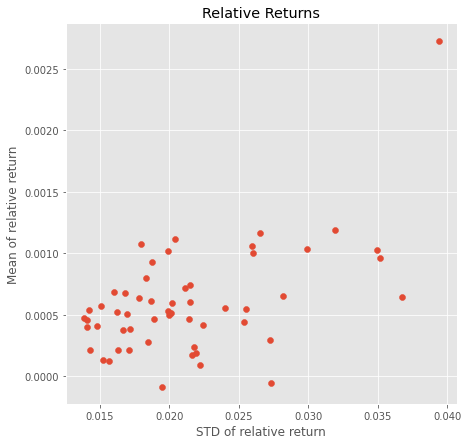

In [55]:
rr_stds, rr_means = relative_returns.std(axis=0), relative_returns.mean(axis=0)
plt.figure(figsize=(7,7))
plt.title("Relative Returns")
plt.scatter(rr_stds, rr_means)
plt.xlabel("STD of relative return")
plt.ylabel("Mean of relative return")
plt.show()

In the log returns we are adding +1 in order to avoid -inf


$$ 
log(1+r_{rel}) = log(1 + {{p_t - p_{t-1}} \over {p_{t-1}}}) = log(1 + {{p_t} \over {p_{t-1}}} - {{p_{t-1}} \over {p_{t-1}}}) = log({{p_t} \over {p_{t-1}}} )
$$

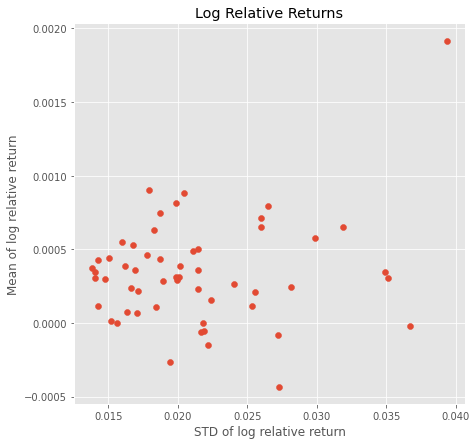

In [53]:
log_relative_returns = np.log(1+stock_adj_close).diff()

log_rr_stds, log_rr_means = log_relative_returns.std(axis=0), log_relative_returns.mean(axis=0)

plt.figure(figsize=(7,7))

plt.title("Log Relative Returns")
plt.scatter(xs, log_rr_means)
plt.xlabel("STD of log relative return")
plt.ylabel("Mean of log relative return")
plt.show()

Finding the efficient frontiers

In [56]:
N = len(rr_stds)
efficient_frontiers = []
for i in range(N):
    is_efficient = True
    for j in range(N):
        if i == j:
            continue

        if rr_stds[i] > rr_stds[j] and rr_means[i] <= rr_means[j]:
            is_efficient = False
            break

        if rr_stds[i] >= rr_stds[j] and rr_means[i] < rr_means[j]:
            is_efficient = False
            break
    
    if is_efficient:
        efficient_frontiers.append(i)

print(f"{len(efficient_frontiers)} Efficient frontier:", stock_adj_close.columns[efficient_frontiers].tolist())

9 Efficient frontier: ['APH', 'CHD', 'CMS', 'CSGP', 'FCX', 'MSFT', 'PFE', 'SEDG', 'TER']


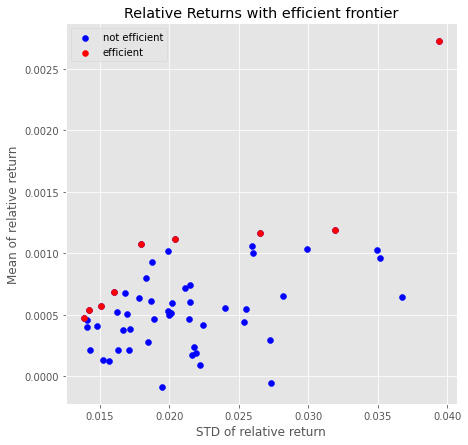

In [57]:
plt.figure(figsize=(7,7))
plt.title("Relative Returns with efficient frontier")

plt.scatter(rr_stds, rr_means, c="blue")

for i in efficient_frontiers:
    plt.scatter(rr_stds[i], rr_means[i], c="red")

plt.legend(["not efficient", "efficient"], loc="best")

plt.xlabel("STD of relative return")
plt.ylabel("Mean of relative return")
plt.show()

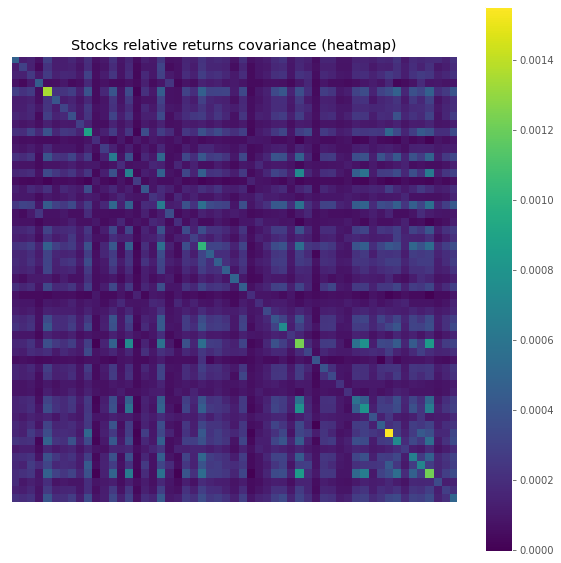

In [58]:
covariance_matrix = relative_returns.cov()

plt.figure(figsize=(10,10))
plt.title("Stocks relative returns covariance (heatmap)")
plt.imshow(covariance_matrix.values)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

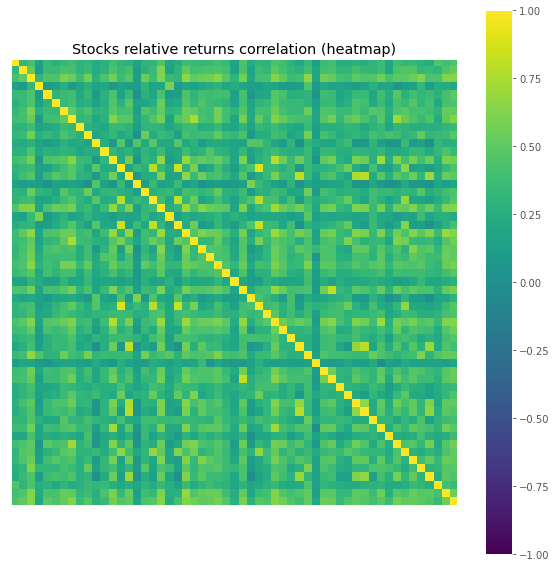

In [59]:
correlation_matrix = relative_returns.corr()

plt.figure(figsize=(10,10))
plt.title("Stocks relative returns correlation (heatmap)")
plt.imshow(correlation_matrix.values, vmin=-1, vmax=1)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

Finding the Minimal Variance Portfolio:

$$
X = {{C^{-1} e} \over {e C^{-1} e}}
$$

In [61]:
cov_inv = np.linalg.inv(covariance_matrix)
e = np.ones(cov_inv.shape[0])
X_mvp = cov_inv @ e / (e @ cov_inv @ e)
X_mvp

array([ 1.54341224e-02,  1.05025813e+00,  6.34520563e-01, -6.71572534e-02,
       -8.22245495e-02,  2.00405092e-01,  5.59621855e-02,  4.28143880e-01,
       -2.58706535e-01, -6.03002902e-01,  1.10823660e-01, -1.87936530e-01,
        3.84197518e-01,  4.29802256e-01, -2.14186050e-01, -1.39350254e-01,
        8.98110891e-03,  6.48467970e-01, -2.95582609e+00,  1.63202432e-01,
        1.91680129e-01,  2.25044506e-01, -5.26721770e-01,  2.68880289e-01,
        3.58802359e-01, -8.95019361e-02,  1.37369551e-01, -3.33774380e-01,
       -2.27469589e-03, -1.77810016e-01, -8.53518344e-01, -2.76227837e-02,
        3.41910485e-01,  1.48102462e-01,  3.82964682e-02,  2.04156329e-01,
       -5.21881216e-02,  8.96477197e-03,  6.18684778e-02,  1.03419018e-01,
        2.96647359e-02, -2.01801889e-01,  2.87962755e-01,  2.00416613e-01,
        9.20600517e-02,  5.81450154e-02,  2.39523096e-02,  1.06539398e-01,
        1.71316155e-01,  1.43063354e-01,  5.17375804e-02,  1.42603804e-01,
       -8.43638953e-02, -

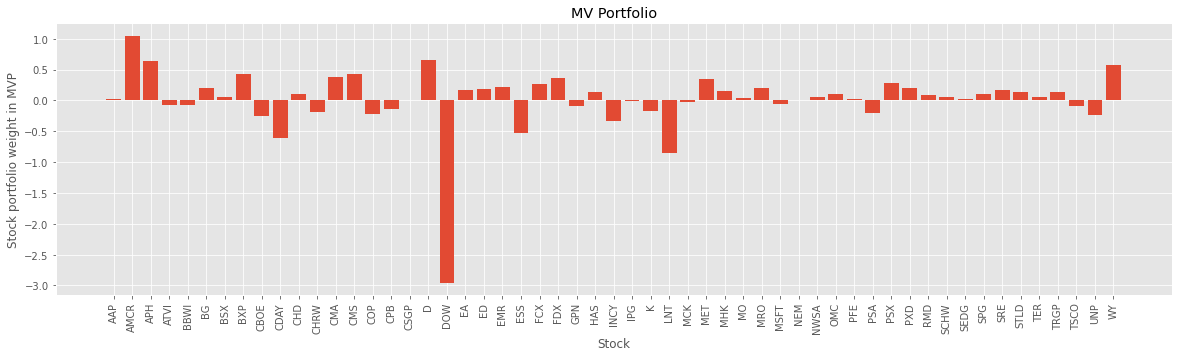

In [62]:
tickers = relative_returns.columns.tolist()

plt.figure(figsize=(20,5))
plt.title("MV Portfolio")
plt.bar(tickers, X_mvp)
plt.xticks(rotation=90)
plt.xlabel("Stock")
plt.ylabel("Stock portfolio weight in MVP")
plt.show()